# Twitter Sentiment Analysis

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [5]:
# Load datasets without headers and specify column name
column_names = ['ID', 'Company name', 'Sentiment', 'Text']
train_df = pd.read_csv("C:/Users/bhumi/Downloads/twitter sentiment/twitter_training.csv", header=None, names=column_names)
valid_df = pd.read_csv("C:/Users/bhumi/Downloads/twitter sentiment/twitter_validation.csv", header=None, names=column_names)

In [9]:
train_df.isnull().sum()

ID                0
Company name      0
Sentiment         0
Text            686
dtype: int64

In [10]:
# Replace NaN values with empty strings
train_df['Text'] = train_df['Text'].fillna('')
valid_df['Text'] = valid_df['Text'].fillna('')

In [11]:
# Ensure all entries are strings
train_df['Text'] = train_df['Text'].astype(str)
valid_df['Text'] = valid_df['Text'].astype(str)

In [12]:
# Extract the text and labels from the DataFrame
train_texts = train_df['Text'].values
train_labels = train_df['Sentiment'].values
valid_texts = valid_df['Text'].values
valid_labels = valid_df['Sentiment'].values

In [14]:
# Tokenizing the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

In [15]:
# Convert texts to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_texts)
valid_sequences = tokenizer.texts_to_sequences(valid_texts)

In [16]:
# Pad sequences to ensure uniform input size
max_length = 100  # Adjust based on your dataset
X_train = pad_sequences(train_sequences, maxlen=max_length)
X_valid = pad_sequences(valid_sequences, maxlen=max_length)

In [17]:
# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_labels)# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_valid = encoder.transform(valid_labels)


In [18]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [37]:
print("Unique classes in train labels:", len(np.unique(train_labels)))
print("Unique classes in valid labels:", len(np.unique(valid_labels)))

Unique classes in train labels: 4
Unique classes in valid labels: 4


In [59]:
# Verify class labels
print("Class Labels:", encoder.classes_)

Class Labels: ['Irrelevant' 'Negative' 'Neutral' 'Positive']


# ANN Model

In [38]:
num_classes = 4  # Update this according to the number of unique classes

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Ensure this matches the number of classes
])


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3885 - loss: 1.2863 - val_accuracy: 0.6690 - val_loss: 0.8459
Epoch 2/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6331 - loss: 0.9045 - val_accuracy: 0.7560 - val_loss: 0.6320
Epoch 3/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7069 - loss: 0.7433 - val_accuracy: 0.8150 - val_loss: 0.5033
Epoch 4/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7487 - loss: 0.6403 - val_accuracy: 0.7630 - val_loss: 0.5671
Epoch 5/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7735 - loss: 0.5871 - val_accuracy: 0.8210 - val_loss: 0.4628
Epoch 6/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7901 - loss: 0.5477 - val_accuracy: 0.8750 - val_loss: 0.3605
Epoch 7/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8028 - loss: 0.5125 - val_accuracy: 0.8800 - val_loss: 0.3407
Epoch 8/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8019 - loss: 0

In [41]:
# Evaluate the model
loss, accuracy = model.evaluate(X_valid, y_valid)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.3449
Validation Loss: 0.35096901655197144
Validation Accuracy: 0.875


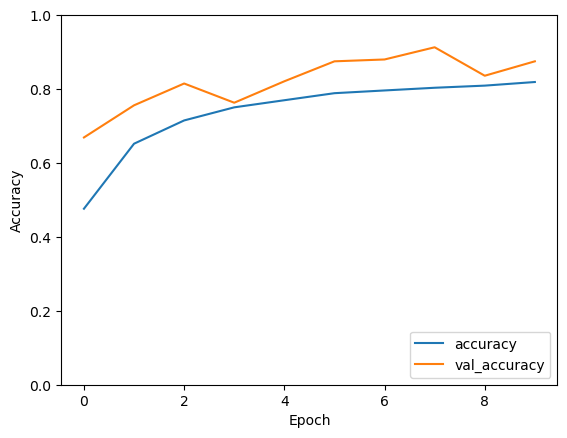

In [42]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [44]:
# Example new text to predict
new_text = ["I love this product!"]

# Tokenize and pad the new text
# Ensure the tokenizer is the same one used during training
new_sequences = tokenizer.texts_to_sequences(new_text)
X_new = pad_sequences(new_sequences, maxlen=max_length)

# Make the prediction
predictions = model.predict(X_new)

# Decode the predictions
# Get the class labels from the encoder
class_labels = encoder.classes_
predicted_class_index = np.argmax(predictions, axis=1)
predicted_label = class_labels[predicted_class_index[0]]

print(f"Text: '{new_text[0]}'")
print(f"Predicted Sentiment: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Text: 'I love this product!'
Predicted Sentiment: Positive


In [45]:
# Example new text to predict
new_text = ["This is worst service ever"]

# Tokenize and pad the new text
# Ensure the tokenizer is the same one used during training
new_sequences = tokenizer.texts_to_sequences(new_text)
X_new = pad_sequences(new_sequences, maxlen=max_length)

# Make the prediction
predictions = model.predict(X_new)

# Decode the predictions
# Get the class labels from the encoder
class_labels = encoder.classes_
predicted_class_index = np.argmax(predictions, axis=1)
predicted_label = class_labels[predicted_class_index[0]]

print(f"Text: '{new_text[0]}'")
print(f"Predicted Sentiment: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Text: 'This is the worst service ever.'
Predicted Sentiment: Negative


In [63]:
# Example new text to predict
new_text = ["i enter that gunner seat and actually fear for my life"]
# Tokenize and pad the new text
# Ensure the tokenizer is the same one used during training
new_sequences = tokenizer.texts_to_sequences(new_text)
X_new = pad_sequences(new_sequences, maxlen=max_length)

# Make the prediction
predictions = model.predict(X_new)

# Decode the predictions
# Get the class labels from the encoder
class_labels = encoder.classes_
predicted_class_index = np.argmax(predictions, axis=1)
predicted_label = class_labels[predicted_class_index[0]]

print(f"Text: '{new_text[0]}'")
print(f"Predicted Sentiment: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Text: 'i enter that gunner seat and actually fear for my life'
Predicted Sentiment: Neutral
